# Predict Prices on laptops using their features
- Price is a target of prediction
- Brand, Processor Speed, RAM Size, Storage Capacity, Screen Size and Weight - the features

In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

import seaborn as sns
import numpy as np

# Reading Raw data from .csv file

In [16]:
raw_data = pd.read_csv('./data/Laptop_price.csv')
print(raw_data.shape)
raw_data.head(10)

(1000, 7)


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


In [17]:
features, target = raw_data.loc[:, raw_data.columns != 'Price'], raw_data.loc[:, 'Price']
features: pd.DataFrame
features

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,Asus,3.830296,16,512,11.185147,2.641094
1,Acer,2.912833,4,1000,11.311372,3.260012
2,Lenovo,3.241627,4,256,11.853023,2.029061
3,Acer,3.806248,16,512,12.280360,4.573865
4,Acer,3.268097,32,1000,14.990877,4.193472
...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399
996,Dell,2.780555,8,256,12.679356,3.750265
997,Dell,3.200569,4,512,12.666315,3.392612
998,Asus,1.604182,8,256,11.215581,3.857613


In [18]:
from tpnn.features import remove_na, replace_categorical_values
remove_na(features, inplace=True)
replace_categorical_values(features, inplace=True)

/Users/tjest/Desktop/vscode/labs/tpnn/tpnn/features.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
print(features.shape)
features.head(10)

(1000, 6)


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,1,3.830296,16,512,11.185147,2.641094
1,0,2.912833,4,1000,11.311372,3.260012
2,4,3.241627,4,256,11.853023,2.029061
3,0,3.806248,16,512,12.280360,4.573865
4,0,3.268097,32,1000,14.990877,4.193472
5,3,1.881348,16,256,11.943958,4.840268
6,4,2.940721,32,256,11.713246,4.344846
7,4,3.016788,4,256,15.588315,2.941120
8,4,2.560327,4,512,15.026332,2.743620
9,0,3.341111,32,512,13.611945,4.093149


In [20]:
from tpnn.features import centerize, normalize
centerize(features, inplace=True)
normalize(features, inplace=True)

/Users/tjest/Desktop/vscode/labs/tpnn/tpnn/features.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.14285714 -1.         -1.         -0.14285714  1.         -0.14285714
  1.         -1.         -1.          1.         -1.          1.
 -0.71428571 -0.14285714 -0.71428571  1.         -0.14285714  1.
 -0.14285714 -0.14285714 -0.14285714 -0.14285714  1.         -0.14285714
 -0.14285714 -0.71428571 -1.         -1.         -0.71428571 -0.71428571
  1.          1.          1.         -0.71428571 -0.71428571 -0.14285714
  1.          1.          1.         -1.         -0.14285714  1.
  1.          1.         -1.         -1.         -0.71428571 -0.14285714
 -0.71428571 -0.14285714 -1.          1.         -0.71428571  1.
 -0.71428571 -1.         -1.         -1.         -0.71428571 -0.14285714
 -0.71428571 -0.14285714 -0.71428571 -0.71428571 -1.          1.
  1.         -0.14285714  1.         -0.71428571 -0.71428571

In [21]:
features.head(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,1,0.864703,-0.142857,-0.311828,-0.942067,-0.571573
1,0,0.126883,-1.000000,1.000000,-0.899806,-0.157604
2,4,0.391298,-1.000000,-1.000000,-0.718459,-0.980937
3,0,0.845364,-0.142857,-0.311828,-0.575384,0.721178
4,0,0.412585,1.000000,1.000000,0.332111,0.466749
5,3,-0.702634,-0.142857,-1.000000,-0.688013,0.899364
6,4,0.149310,1.000000,-1.000000,-0.765256,0.567997
7,4,0.210483,-1.000000,-1.000000,0.532136,-0.370898
8,4,-0.156602,-1.000000,-0.311828,0.343981,-0.502998
9,0,0.471302,1.000000,-0.311828,-0.129562,0.399647


<Axes: >

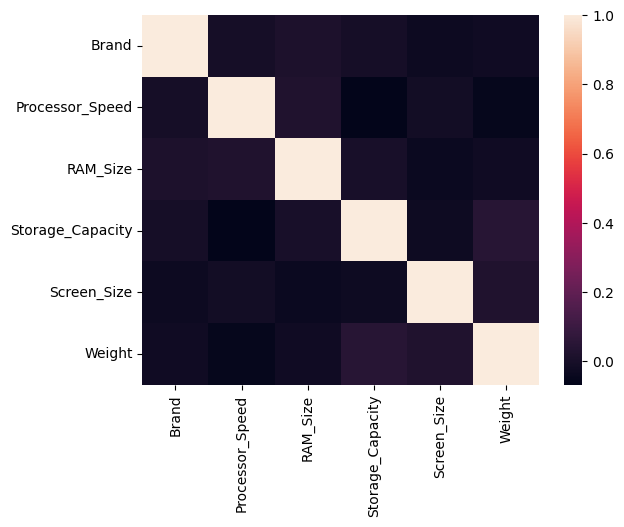

In [22]:
corr_matrix = features.corr()
sns.heatmap(corr_matrix)

In [23]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0, train_size = 0.8)

## Find important features with Gain Ratio

Brand               1.395392
Processor_Speed     0.590563
RAM_Size            0.788461
Storage_Capacity    0.844729
Screen_Size         0.567362
Weight              0.583097
dtype: object

## Find important features with sklearn implementation

In [24]:
reg = DecisionTreeRegressor(random_state=0, max_depth=5)
reg.fit(features_train, target_train)
reg.score(features_test, target_test)

0.999424067528727

In [25]:
random_features, random_target = features.iloc[10].values.reshape(1, -1), target.iloc[10]
# print(random_features, random_target)
print(f'predicted cost: {reg.predict(random_features)}')
print(f'target cost: {random_target}')

predicted cost: [31610.19987379]
target cost: 31967.607631536364


/Users/tjest/Desktop/vscode/labs/tpnn/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


/Users/tjest/Desktop/vscode/labs/tpnn/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


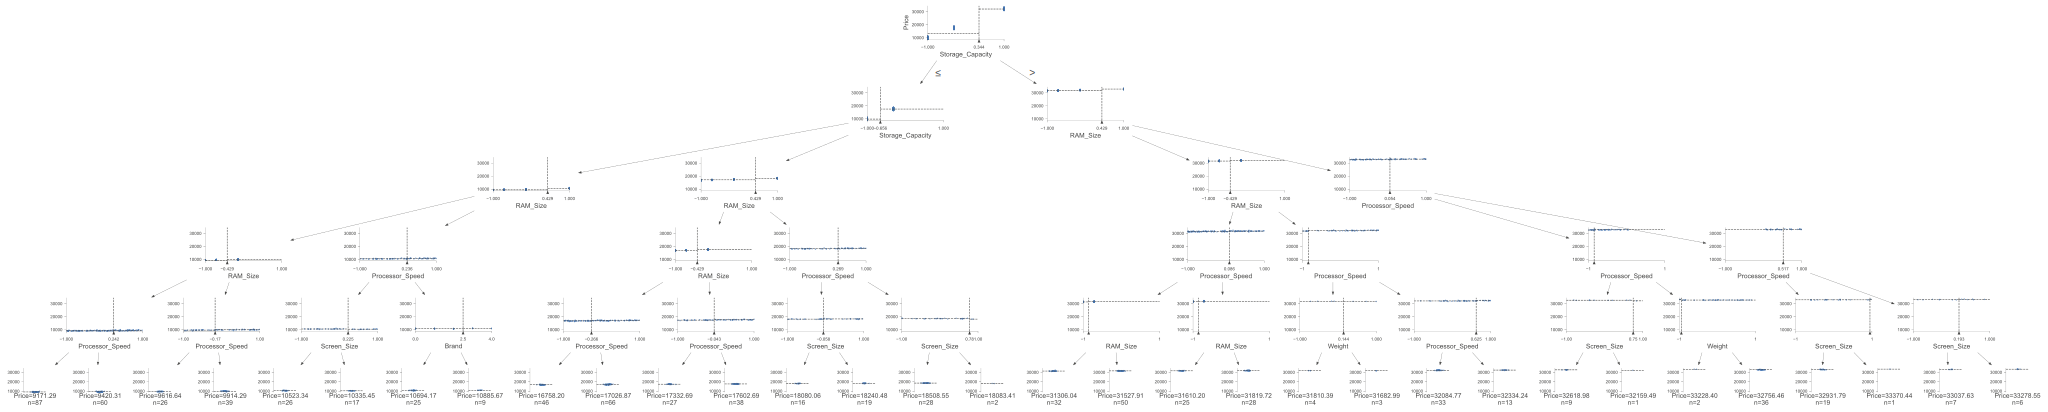

In [27]:
from dtreeviz.trees import model

viz = model(reg, features_train, target_train, feature_names=features_train.columns, target_name=target_train.name)
viz.view()

In [ ]:
gain_ratios = {}
print(f"{reg.feature_importances_=}")
print(f"{reg.tree_.impurity=}")
# Print the gain ratio for each feature
for gain, split, feature in zip(reg.feature_importances_, reg.tree_.impurity, features.columns):
    gain_ratio = gain / split
    print(f'Gain ratio for {feature}: {gain_ratio}')

    gain_ratios[feature] = gain_ratio

# Find the feature with the highest gain ratio
best_feature = max(gain_ratios, key=gain_ratios.get)

print(f'Best feature: {best_feature}')

reg.feature_importances_=array([3.40773094e-06, 2.29168401e-04, 3.57849266e-03, 9.96161775e-01,
       2.08399628e-05, 6.31660335e-06])
reg.tree_.impurity=array([ 8.90608373e+07,  1.51100409e+07,  3.64629955e+05,  1.23264809e+05,
        6.32552271e+04,  4.55956960e+04,  5.21613304e+04,  6.98242003e+04,
        5.19996234e+04,  4.62702262e+04,  6.47487401e+04,  3.66820663e+04,
        3.59193996e+04,  1.65026245e+04,  5.13811285e+04,  5.28573662e+04,
        2.03152447e+04,  3.92811457e+05,  1.36920328e+05,  6.42289728e+04,
        5.18302760e+04,  4.32226943e+04,  5.36806760e+04,  3.70358835e+04,
        3.52256497e+04,  6.37462463e+04,  4.18651030e+04,  2.42616104e+04,
        4.49236506e+04,  3.64990319e+04,  2.68764509e+04,  2.51859519e+03,
        3.90248314e+05,  1.33483219e+05,  7.56843546e+04,  5.65730157e+04,
        6.16034067e+04,  3.41437848e+04,  5.77794129e+04,  4.23733923e+04,
        5.08279381e+04,  6.23533812e+04,  5.64599803e+03,  2.71047505e+03,
        2.84922154e+